In [339]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [341]:
df = pd.read_csv("C:\\Users\\admin\\Desktop\\Datasets\\DATADATADATA.csv")
#Classify Stars-0, Galaxy-1
df.head(20)

,u,g,r,i,z,class
0,19.47406,17.04240,15.94699,15.50342,15.22531,0
1,18.66280,17.21449,16.67637,16.48922,16.39150,0
2,19.38298,18.19169,17.47428,17.08732,16.80125,1
3,17.76536,16.60272,16.16116,15.98233,15.90438,0
4,17.55025,16.26342,16.43869,16.55492,16.61326,0
5,19.43133,18.46779,18.16451,18.01475,18.04155,0
6,19.38322,17.88995,17.10537,16.66393,16.36955,1
7,18.97993,17.84496,17.38022,17.20673,17.07071,0
8,17.90616,16.97172,16.67541,16.53776,16.47596,0
9,18.67249,17.71375,17.49362,17.28284,17.22644,1


In [342]:
df = pd.read_csv("C:\\Users\\admin\\Desktop\\Datasets\\DATADATADATA.csv")
#Classify Stars-0, Galaxy-1
df.head(20)

,u,g,r,i,z,class
0,19.47406,17.04240,15.94699,15.50342,15.22531,0
1,18.66280,17.21449,16.67637,16.48922,16.39150,0
2,19.38298,18.19169,17.47428,17.08732,16.80125,1
3,17.76536,16.60272,16.16116,15.98233,15.90438,0
4,17.55025,16.26342,16.43869,16.55492,16.61326,0
5,19.43133,18.46779,18.16451,18.01475,18.04155,0
6,19.38322,17.88995,17.10537,16.66393,16.36955,1
7,18.97993,17.84496,17.38022,17.20673,17.07071,0
8,17.90616,16.97172,16.67541,16.53776,16.47596,0
9,18.67249,17.71375,17.49362,17.28284,17.22644,1


In [343]:
dataset = df.values
dataset

x = dataset[:,0:5]
y = dataset[:,5]


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.97185518, 0.56112195, 0.43198054, 0.25746008, 0.36884444],
       [0.790138  , 0.59074937, 0.53554932, 0.34013971, 0.50666166],
       [0.95145383, 0.75898645, 0.64884905, 0.39030271, 0.55508482],
       ...,
       [0.49958673, 0.45475487, 0.448834  , 0.2923536 , 0.4430208 ],
       [0.36130194, 0.31795292, 0.33645866, 0.2285826 , 0.35679981],
       [0.8873849 , 0.57145858, 0.44132243, 0.26238915, 0.36384554]])

In [344]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.2)

x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)


print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)
y_test

(736, 5) (92, 5) (92, 5) (736,) (92,) (92,)


array([1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0.])

In [345]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(32, activation='relu', input_shape=(5,)))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(2, activation= 'sigmoid'))
          
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [346]:
hist = model.fit(x_train, y_train,
          batch_size=32, epochs=1000,shuffle = True,
          validation_data=(x_val, y_val))

Train on 736 samples, validate on 92 samples
Epoch 1/1000
736/736 [==============================] - 1s 1ms/step - loss: 0.6953 - accuracy: 0.4851 - val_loss: 0.6863 - val_accuracy: 0.5435
Epoch 2/1000
736/736 [==============================] - 0s 71us/step - loss: 0.6874 - accuracy: 0.5829 - val_loss: 0.6843 - val_accuracy: 0.5435
Epoch 3/1000
736/736 [==============================] - 0s 71us/step - loss: 0.6825 - accuracy: 0.5965 - val_loss: 0.6819 - val_accuracy: 0.5435
Epoch 4/1000
736/736 [==============================] - 0s 69us/step - loss: 0.6809 - accuracy: 0.5910 - val_loss: 0.6795 - val_accuracy: 0.5435
Epoch 5/1000
736/736 [==============================] - 0s 61us/step - loss: 0.6751 - accuracy: 0.5978 - val_loss: 0.6735 - val_accuracy: 0.5435
Epoch 6/1000
736/736 [==============================] - 0s 67us/step - loss: 0.6699 - accuracy: 0.6155 - val_loss: 0.6628 - val_accuracy: 0.6413
Epoch 7/1000
736/736 [==============================] - 0s 75us/step - loss: 0.6596 - 

Epoch 57/1000
736/736 [==============================] - 0s 73us/step - loss: 0.4714 - accuracy: 0.7867 - val_loss: 0.3755 - val_accuracy: 0.8913
Epoch 58/1000
736/736 [==============================] - 0s 71us/step - loss: 0.4695 - accuracy: 0.7853 - val_loss: 0.3690 - val_accuracy: 0.9130
Epoch 59/1000
736/736 [==============================] - 0s 72us/step - loss: 0.4782 - accuracy: 0.7894 - val_loss: 0.3803 - val_accuracy: 0.9022
Epoch 60/1000
736/736 [==============================] - 0s 61us/step - loss: 0.4587 - accuracy: 0.7976 - val_loss: 0.3663 - val_accuracy: 0.8913
Epoch 61/1000
736/736 [==============================] - 0s 60us/step - loss: 0.4684 - accuracy: 0.7880 - val_loss: 0.3861 - val_accuracy: 0.8696
Epoch 62/1000
736/736 [==============================] - 0s 64us/step - loss: 0.4742 - accuracy: 0.7976 - val_loss: 0.3673 - val_accuracy: 0.9022
Epoch 63/1000
736/736 [==============================] - 0s 65us/step - loss: 0.4624 - accuracy: 0.7976 - val_loss: 0.3750 -

736/736 [==============================] - 0s 62us/step - loss: 0.3880 - accuracy: 0.8451 - val_loss: 0.3410 - val_accuracy: 0.8261
Epoch 114/1000
736/736 [==============================] - 0s 58us/step - loss: 0.3972 - accuracy: 0.8492 - val_loss: 0.2828 - val_accuracy: 0.9457
Epoch 115/1000
736/736 [==============================] - 0s 60us/step - loss: 0.3853 - accuracy: 0.8505 - val_loss: 0.2956 - val_accuracy: 0.9457
Epoch 116/1000
736/736 [==============================] - 0s 61us/step - loss: 0.3908 - accuracy: 0.8288 - val_loss: 0.2827 - val_accuracy: 0.9457
Epoch 117/1000
736/736 [==============================] - 0s 64us/step - loss: 0.3755 - accuracy: 0.8519 - val_loss: 0.2817 - val_accuracy: 0.9457
Epoch 118/1000
736/736 [==============================] - 0s 60us/step - loss: 0.3752 - accuracy: 0.8505 - val_loss: 0.2904 - val_accuracy: 0.9130
Epoch 119/1000
736/736 [==============================] - 0s 57us/step - loss: 0.3585 - accuracy: 0.8587 - val_loss: 0.3179 - val_acc

Epoch 169/1000
736/736 [==============================] - 0s 65us/step - loss: 0.2904 - accuracy: 0.8927 - val_loss: 0.1958 - val_accuracy: 0.9565
Epoch 170/1000
736/736 [==============================] - 0s 68us/step - loss: 0.2991 - accuracy: 0.8995 - val_loss: 0.1901 - val_accuracy: 0.9565
Epoch 171/1000
736/736 [==============================] - 0s 77us/step - loss: 0.2796 - accuracy: 0.9049 - val_loss: 0.1919 - val_accuracy: 0.9565
Epoch 172/1000
736/736 [==============================] - 0s 73us/step - loss: 0.2903 - accuracy: 0.8981 - val_loss: 0.1967 - val_accuracy: 0.9457
Epoch 173/1000
736/736 [==============================] - 0s 75us/step - loss: 0.2803 - accuracy: 0.9049 - val_loss: 0.2035 - val_accuracy: 0.9348
Epoch 174/1000
736/736 [==============================] - 0s 72us/step - loss: 0.2860 - accuracy: 0.9022 - val_loss: 0.1880 - val_accuracy: 0.9565
Epoch 175/1000
736/736 [==============================] - 0s 67us/step - loss: 0.3092 - accuracy: 0.8954 - val_loss: 0

Epoch 225/1000
736/736 [==============================] - 0s 86us/step - loss: 0.2642 - accuracy: 0.9171 - val_loss: 0.1700 - val_accuracy: 0.9457
Epoch 226/1000
736/736 [==============================] - 0s 143us/step - loss: 0.2736 - accuracy: 0.9103 - val_loss: 0.1719 - val_accuracy: 0.9565
Epoch 227/1000
736/736 [==============================] - 0s 121us/step - loss: 0.2633 - accuracy: 0.9158 - val_loss: 0.1831 - val_accuracy: 0.9457
Epoch 228/1000
736/736 [==============================] - 0s 73us/step - loss: 0.2390 - accuracy: 0.9293 - val_loss: 0.1697 - val_accuracy: 0.9457
Epoch 229/1000
736/736 [==============================] - 0s 110us/step - loss: 0.2642 - accuracy: 0.9171 - val_loss: 0.1591 - val_accuracy: 0.9565
Epoch 230/1000
736/736 [==============================] - 0s 67us/step - loss: 0.2507 - accuracy: 0.9130 - val_loss: 0.1685 - val_accuracy: 0.9457
Epoch 231/1000
736/736 [==============================] - 0s 71us/step - loss: 0.2749 - accuracy: 0.9049 - val_loss

Epoch 336/1000
736/736 [==============================] - 0s 68us/step - loss: 0.2344 - accuracy: 0.9280 - val_loss: 0.1382 - val_accuracy: 0.9565
Epoch 337/1000
736/736 [==============================] - 0s 75us/step - loss: 0.2313 - accuracy: 0.9348 - val_loss: 0.1519 - val_accuracy: 0.9457
Epoch 338/1000
736/736 [==============================] - 0s 62us/step - loss: 0.2354 - accuracy: 0.9348 - val_loss: 0.1383 - val_accuracy: 0.9565
Epoch 339/1000
736/736 [==============================] - 0s 64us/step - loss: 0.2407 - accuracy: 0.9239 - val_loss: 0.1443 - val_accuracy: 0.9674
Epoch 340/1000
736/736 [==============================] - 0s 61us/step - loss: 0.2262 - accuracy: 0.9321 - val_loss: 0.1429 - val_accuracy: 0.9565
Epoch 341/1000
736/736 [==============================] - 0s 67us/step - loss: 0.2351 - accuracy: 0.9239 - val_loss: 0.1344 - val_accuracy: 0.9457
Epoch 342/1000
736/736 [==============================] - 0s 67us/step - loss: 0.2208 - accuracy: 0.9375 - val_loss: 0

Epoch 392/1000
736/736 [==============================] - 0s 65us/step - loss: 0.2295 - accuracy: 0.9321 - val_loss: 0.1309 - val_accuracy: 0.9565
Epoch 393/1000
736/736 [==============================] - 0s 71us/step - loss: 0.2252 - accuracy: 0.9212 - val_loss: 0.1414 - val_accuracy: 0.9565
Epoch 394/1000
736/736 [==============================] - 0s 72us/step - loss: 0.2330 - accuracy: 0.9212 - val_loss: 0.1503 - val_accuracy: 0.9457
Epoch 395/1000
736/736 [==============================] - 0s 61us/step - loss: 0.2274 - accuracy: 0.9334 - val_loss: 0.1454 - val_accuracy: 0.9565
Epoch 396/1000
736/736 [==============================] - 0s 57us/step - loss: 0.2531 - accuracy: 0.9226 - val_loss: 0.1359 - val_accuracy: 0.9565
Epoch 397/1000
736/736 [==============================] - 0s 58us/step - loss: 0.2275 - accuracy: 0.9253 - val_loss: 0.1328 - val_accuracy: 0.9674
Epoch 398/1000
736/736 [==============================] - 0s 68us/step - loss: 0.2121 - accuracy: 0.9457 - val_loss: 0

Epoch 503/1000
736/736 [==============================] - 0s 92us/step - loss: 0.1981 - accuracy: 0.9429 - val_loss: 0.1225 - val_accuracy: 0.9565
Epoch 504/1000
736/736 [==============================] - 0s 73us/step - loss: 0.1999 - accuracy: 0.9402 - val_loss: 0.1270 - val_accuracy: 0.9565
Epoch 505/1000
736/736 [==============================] - 0s 70us/step - loss: 0.1896 - accuracy: 0.9429 - val_loss: 0.1571 - val_accuracy: 0.9239
Epoch 506/1000
736/736 [==============================] - 0s 67us/step - loss: 0.2010 - accuracy: 0.9375 - val_loss: 0.1345 - val_accuracy: 0.9565
Epoch 507/1000
736/736 [==============================] - 0s 67us/step - loss: 0.2014 - accuracy: 0.9429 - val_loss: 0.1285 - val_accuracy: 0.9674
Epoch 508/1000
736/736 [==============================] - 0s 71us/step - loss: 0.2118 - accuracy: 0.9375 - val_loss: 0.1311 - val_accuracy: 0.9565
Epoch 509/1000
736/736 [==============================] - 0s 69us/step - loss: 0.2232 - accuracy: 0.9307 - val_loss: 0

Epoch 559/1000
736/736 [==============================] - 0s 65us/step - loss: 0.2071 - accuracy: 0.9429 - val_loss: 0.1306 - val_accuracy: 0.9565
Epoch 560/1000
736/736 [==============================] - 0s 75us/step - loss: 0.2022 - accuracy: 0.9457 - val_loss: 0.1212 - val_accuracy: 0.9565
Epoch 561/1000
736/736 [==============================] - 0s 65us/step - loss: 0.1884 - accuracy: 0.9375 - val_loss: 0.1368 - val_accuracy: 0.9457
Epoch 562/1000
736/736 [==============================] - 0s 60us/step - loss: 0.1995 - accuracy: 0.9361 - val_loss: 0.1270 - val_accuracy: 0.9565
Epoch 563/1000
736/736 [==============================] - 0s 62us/step - loss: 0.2293 - accuracy: 0.9226 - val_loss: 0.1279 - val_accuracy: 0.9565
Epoch 564/1000
736/736 [==============================] - 0s 62us/step - loss: 0.2171 - accuracy: 0.9348 - val_loss: 0.1261 - val_accuracy: 0.9565
Epoch 565/1000
736/736 [==============================] - 0s 60us/step - loss: 0.1863 - accuracy: 0.9457 - val_loss: 0

Epoch 670/1000
736/736 [==============================] - 0s 86us/step - loss: 0.2222 - accuracy: 0.9334 - val_loss: 0.1655 - val_accuracy: 0.9130
Epoch 671/1000
736/736 [==============================] - 0s 99us/step - loss: 0.2141 - accuracy: 0.9307 - val_loss: 0.1386 - val_accuracy: 0.9565
Epoch 672/1000
736/736 [==============================] - 0s 110us/step - loss: 0.1934 - accuracy: 0.9402 - val_loss: 0.1376 - val_accuracy: 0.9565
Epoch 673/1000
736/736 [==============================] - 0s 136us/step - loss: 0.2057 - accuracy: 0.9361 - val_loss: 0.1314 - val_accuracy: 0.9565
Epoch 674/1000
736/736 [==============================] - 0s 92us/step - loss: 0.2080 - accuracy: 0.9280 - val_loss: 0.1436 - val_accuracy: 0.9565
Epoch 675/1000
736/736 [==============================] - 0s 110us/step - loss: 0.2117 - accuracy: 0.9334 - val_loss: 0.1451 - val_accuracy: 0.9457
Epoch 676/1000
736/736 [==============================] - 0s 125us/step - loss: 0.2147 - accuracy: 0.9334 - val_los

736/736 [==============================] - 0s 118us/step - loss: 0.2268 - accuracy: 0.9239 - val_loss: 0.1503 - val_accuracy: 0.9565
Epoch 781/1000
736/736 [==============================] - 0s 119us/step - loss: 0.2041 - accuracy: 0.9280 - val_loss: 0.1675 - val_accuracy: 0.9130
Epoch 782/1000
736/736 [==============================] - 0s 123us/step - loss: 0.2049 - accuracy: 0.9375 - val_loss: 0.1283 - val_accuracy: 0.9565
Epoch 783/1000
736/736 [==============================] - 0s 112us/step - loss: 0.1944 - accuracy: 0.9389 - val_loss: 0.1317 - val_accuracy: 0.9565
Epoch 784/1000
736/736 [==============================] - 0s 112us/step - loss: 0.1872 - accuracy: 0.9457 - val_loss: 0.1449 - val_accuracy: 0.9565
Epoch 785/1000
736/736 [==============================] - 0s 129us/step - loss: 0.1928 - accuracy: 0.9361 - val_loss: 0.1487 - val_accuracy: 0.9239
Epoch 786/1000
736/736 [==============================] - 0s 114us/step - loss: 0.1952 - accuracy: 0.9389 - val_loss: 0.1451 - 

736/736 [==============================] - 0s 115us/step - loss: 0.2008 - accuracy: 0.9321 - val_loss: 0.1254 - val_accuracy: 0.9674
Epoch 891/1000
736/736 [==============================] - ETA: 0s - loss: 0.1855 - accuracy: 0.94 - 0s 119us/step - loss: 0.1912 - accuracy: 0.9334 - val_loss: 0.1368 - val_accuracy: 0.9565
Epoch 892/1000
736/736 [==============================] - 0s 104us/step - loss: 0.1940 - accuracy: 0.9429 - val_loss: 0.1357 - val_accuracy: 0.9565
Epoch 893/1000
736/736 [==============================] - 0s 110us/step - loss: 0.1856 - accuracy: 0.9484 - val_loss: 0.1544 - val_accuracy: 0.9348
Epoch 894/1000
736/736 [==============================] - 0s 103us/step - loss: 0.2118 - accuracy: 0.9293 - val_loss: 0.1312 - val_accuracy: 0.9565
Epoch 895/1000
736/736 [==============================] - 0s 106us/step - loss: 0.1966 - accuracy: 0.9389 - val_loss: 0.1275 - val_accuracy: 0.9565
Epoch 896/1000
736/736 [==============================] - 0s 102us/step - loss: 0.187

736/736 [==============================] - 0s 81us/step - loss: 0.1850 - accuracy: 0.9361 - val_loss: 0.1281 - val_accuracy: 0.9565


In [347]:
model.evaluate(x_test, y_test)[1]

92/92 [==============================] - 0s 76us/step


0.967391312122345

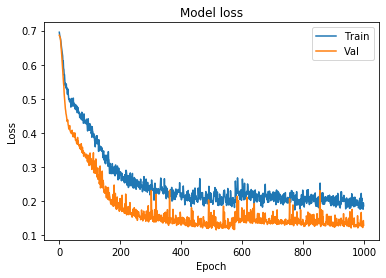

In [348]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

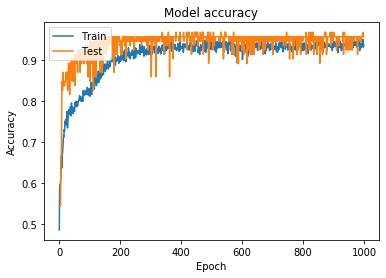

In [349]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [357]:
model.save("96% Accuracy.h5")

In [350]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 32)                192       
_________________________________________________________________
dropout_54 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_55 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 2)                 66        
Total params: 1,314
Trainable params: 1,314
Non-trainable params: 0
_________________________________________________________________


In [351]:
predictions = model.predict(x_test)

In [352]:
for i in predictions:
    print(i)

[0.00744763 0.46698916]
[0.00271207 0.708924  ]
[0.70731574 0.02122357]
[0.7895354  0.01532307]
[0.00247481 0.7397054 ]
[0.00257993 0.7276246 ]
[0.00266898 0.7299127 ]
[0.7240763  0.02084884]
[0.00747165 0.44604027]
[0.00646687 0.55040985]
[0.7420754  0.01930591]
[0.00401312 0.6180672 ]
[0.06224319 0.0962047 ]
[0.6032188  0.02399567]
[0.01258901 0.40752456]
[0.0044674 0.5429041]
[0.8370693  0.01993683]
[0.00318784 0.65128034]
[0.01885951 0.28140637]
[0.01709181 0.3643558 ]
[0.78189915 0.01677558]
[0.00370973 0.6287943 ]
[0.00767699 0.53305954]
[0.7051312  0.02065182]
[0.6387733  0.02634335]
[0.9887915  0.02439559]
[0.94346577 0.03932479]
[0.29363686 0.02931157]
[0.9705783 0.0108377]
[0.81812966 0.01560089]
[0.01793018 0.26920632]
[0.02390799 0.21710017]
[0.00869262 0.3788435 ]
[0.00299546 0.7175296 ]
[0.915763   0.01739159]
[0.01627907 0.32064223]
[0.06343475 0.08953863]
[0.8598733  0.01501548]
[0.01211476 0.36911023]
[0.709636   0.01667294]
[0.25611997 0.02588588]
[0.00701004 0.534752

In [353]:
rounded_predictions = model.predict_classes(x_test)

In [354]:
for i in rounded_predictions:
    print(i)

1
1
0
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
1
1
0
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
1
0
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
0


In [355]:
results = confusion_matrix(y_test, rounded_predictions)
print(results)

[[43  0]
 [ 3 46]]


In [356]:
accuracy = accuracy_score(y_test, rounded_predictions)
print('Accuracy: %f'% accuracy)

Accuracy: 0.967391


In [358]:
precision = precision_score(y_test, rounded_predictions)
print('Precision: %f' % precision)

Precision: 1.000000


In [359]:
recall = recall_score(y_test, rounded_predictions)
print('Recall: %f' % recall)

Recall: 0.938776


In [360]:
f1 = f1_score(y_test, rounded_predictions)
print('F1 score: %f' % f1)

F1 score: 0.968421
